In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

# Preprocessing

In [2]:
d="/kaggle/input/garbage-classification/Garbage classification/Garbage classification"

In [3]:
classes=["cardboard","glass","metal","paper","plastic","trash"]

In [4]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [5]:
data=np.array(data)
import random
random.shuffle(data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [6]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [7]:
x=np.array(X)
y=np.array(Y)
print(x.shape,y.shape)

(2527, 224, 224, 3) (2527,)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4, stratify=y)

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1516, 224, 224, 3) (1516,)
(1011, 224, 224, 3) (1011,)


# Build MobileNetV2 Model

In [10]:
model_mobileNet=tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

14536120/14536120 [==============================] - 0s 0us/step


In [11]:
model_mobileNet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [12]:
base_input1=model_mobileNet.layers[0].input
base_output1=model_mobileNet.layers[-2].output

final_output1 = layers.Dense(128)(base_output1) 
final_output1 = layers.Activation('relu')(final_output1) 
final_output1 = layers.Dense(64)(final_output1)
final_output1 = layers.Activation('relu')(final_output1)
final_output1 = layers.Dense(6, activation='softmax')(final_output1) 

In [13]:
new_model_mobileNet = tf.keras.Model(inputs = base_input1, outputs = final_output1)

In [14]:
new_model_mobileNet.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

# Train MobileNetV2 Model

In [15]:
history=new_model_mobileNet.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
48/48 [==============================] - 31s 231ms/step - loss: 0.8682 - accuracy: 0.7078 - val_loss: 1.0279 - val_accuracy: 0.6222
Epoch 2/20
48/48 [==============================] - 7s 155ms/step - loss: 0.3226 - accuracy: 0.9116 - val_loss: 0.7443 - val_accuracy: 0.7626
Epoch 3/20
48/48 [==============================] - 7s 155ms/step - loss: 0.1563 - accuracy: 0.9584 - val_loss: 0.5980 - val_accuracy: 0.8111
Epoch 4/20
48/48 [==============================] - 7s 155ms/step - loss: 0.0913 - accuracy: 0.9796 - val_loss: 0.5475 - val_accuracy: 0.8170
Epoch 5/20
48/48 [==============================] - 9s 181ms/step - loss: 0.0547 - accuracy: 0.9927 - val_loss: 0.7723 - val_accuracy: 0.7270
Epoch 6/20
48/48 [==============================] - 7s 156ms/step - loss: 0.0377 - accuracy: 0.9960 - val_loss: 0.5611 - val_accuracy: 0.7943
Epoch 7/20
48/48 [==============================] - 9s 183ms/step - loss: 0.0296 - accuracy: 0.9934 - val_loss: 0.5054 - val_accuracy: 0.8279
Epoch

In [16]:
#new_model_mobileNet.save("new_model_mobileNet.h5")

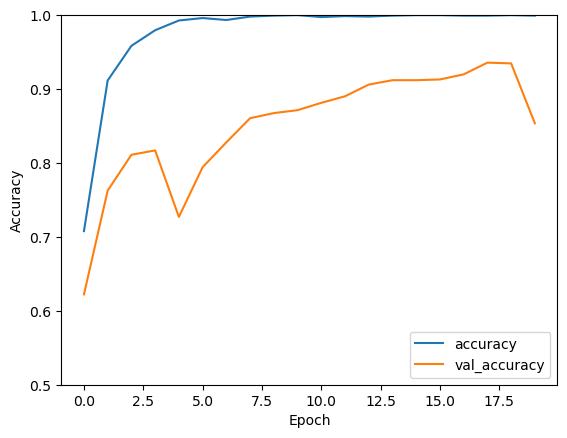

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Build ResNet50V2 Model

In [18]:
model_resNet50V2=tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

102869336/102869336 [==============================] - 1s 0us/step


In [19]:
model_resNet50V2.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [20]:
base_input2=model_resNet50V2.layers[0].input
base_output2=model_resNet50V2.layers[-2].output

final_output2 = layers.Dense(240)(base_output2) 
final_output2 = layers.Activation('relu')(final_output2) 
final_output2 = layers.Dense(128)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)
final_output2 = layers.Dense(64)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)
final_output2 = layers.Dense(6, activation='softmax')(final_output2) 

In [21]:
new_model_resNet50V2 = tf.keras.Model(inputs = base_input2, outputs = final_output2)

In [22]:
new_model_resNet50V2.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

# Train RseNet50V2 Model

In [23]:
result=new_model_resNet50V2.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
48/48 [==============================] - 36s 459ms/step - loss: 1.0788 - accuracy: 0.6240 - val_loss: 0.6903 - val_accuracy: 0.7310
Epoch 2/20
48/48 [==============================] - 16s 339ms/step - loss: 0.4337 - accuracy: 0.8714 - val_loss: 0.6192 - val_accuracy: 0.7864
Epoch 3/20
48/48 [==============================] - 16s 337ms/step - loss: 0.2194 - accuracy: 0.9459 - val_loss: 0.3902 - val_accuracy: 0.8773
Epoch 4/20
48/48 [==============================] - 16s 335ms/step - loss: 0.1090 - accuracy: 0.9716 - val_loss: 0.3555 - val_accuracy: 0.8783
Epoch 5/20
48/48 [==============================] - 16s 335ms/step - loss: 0.0671 - accuracy: 0.9888 - val_loss: 0.2947 - val_accuracy: 0.9041
Epoch 6/20
48/48 [==============================] - 18s 386ms/step - loss: 0.0391 - accuracy: 0.9974 - val_loss: 0.3368 - val_accuracy: 0.8961
Epoch 7/20
48/48 [==============================] - 19s 388ms/step - loss: 0.0284 - accuracy: 0.9974 - val_loss: 0.3708 - val_accuracy: 0.8843

In [24]:
new_model_resNet50V2.evaluate(x_test,y_test)

32/32 [==============================] - 3s 91ms/step - loss: 0.2988 - accuracy: 0.9159


[0.29884231090545654, 0.9159248471260071]

In [25]:
#new_model_resNet50V2.save("new_model_resNet50V2.h5")

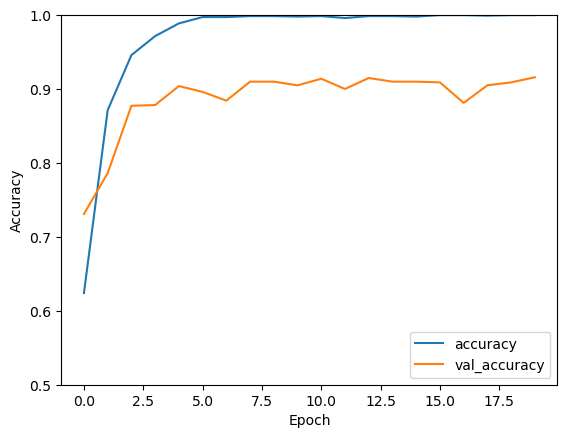

In [26]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Build DenseNet169 Model

In [27]:
model_denseNet169=tf.keras.applications.densenet.DenseNet169(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

58541896/58541896 [==============================] - 0s 0us/step


In [28]:
model_denseNet169.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [29]:
base_input3=model_denseNet169.layers[0].input
base_output3=model_denseNet169.layers[-2].output

final_output3 = layers.Dense(240)(base_output3) 
final_output3 = layers.Activation('relu')(final_output3) 
final_output3 = layers.Dense(128)(final_output3) 
final_output3 = layers.Activation('relu')(final_output3) 
final_output3 = layers.Dense(64)(final_output3)
final_output3 = layers.Activation('relu')(final_output3)
final_output3 = layers.Dense(6, activation='softmax')(final_output3) 

In [30]:
new_model_denseNet169 = tf.keras.Model(inputs = base_input3, outputs = final_output3)

In [31]:
new_model_denseNet169.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

# Train DenseNet169 Model

In [32]:
result_D=new_model_denseNet169.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
48/48 [==============================] - 78s 714ms/step - loss: 0.7903 - accuracy: 0.7394 - val_loss: 0.7794 - val_accuracy: 0.7577
Epoch 2/20
48/48 [==============================] - 25s 531ms/step - loss: 0.2781 - accuracy: 0.9268 - val_loss: 0.4511 - val_accuracy: 0.8536
Epoch 3/20
48/48 [==============================] - 24s 498ms/step - loss: 0.1195 - accuracy: 0.9723 - val_loss: 0.6450 - val_accuracy: 0.8042
Epoch 4/20
48/48 [==============================] - 25s 533ms/step - loss: 0.0616 - accuracy: 0.9894 - val_loss: 0.2452 - val_accuracy: 0.9149
Epoch 5/20
48/48 [==============================] - 25s 531ms/step - loss: 0.0351 - accuracy: 0.9974 - val_loss: 0.1898 - val_accuracy: 0.9308
Epoch 6/20
48/48 [==============================] - 24s 500ms/step - loss: 0.0192 - accuracy: 0.9974 - val_loss: 0.1873 - val_accuracy: 0.9407
Epoch 7/20
48/48 [==============================] - 24s 499ms/step - loss: 0.0145 - accuracy: 0.9993 - val_loss: 0.1784 - val_accuracy: 0.9407

In [33]:
new_model_denseNet169.evaluate(x_test,y_test)

32/32 [==============================] - 4s 116ms/step - loss: 0.1324 - accuracy: 0.9575


[0.1323872208595276, 0.9574678540229797]

In [34]:
new_model_denseNet169.save("new_model_denseNet169.h5")

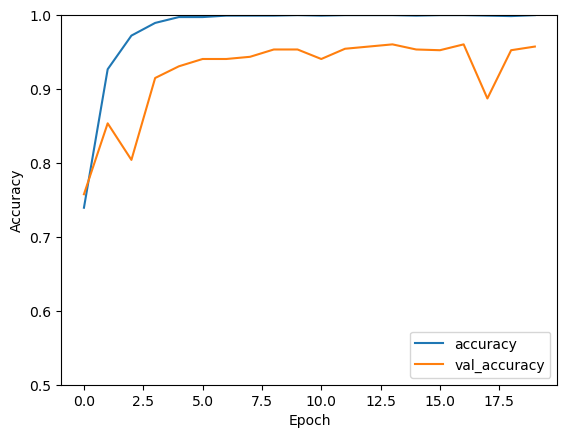

In [35]:
plt.plot(result_D.history['accuracy'], label='accuracy')
plt.plot(result_D.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Build VGG19 Mode

In [36]:
model_vgg19=tf.keras.applications.vgg19.VGG19(
    input_shape=None,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

574710816/574710816 [==============================] - 7s 0us/step


In [37]:
model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [38]:
base_input4=model_vgg19.layers[0].input
base_output4=model_vgg19.layers[-2].output

final_output4 = layers.Dense(240)(base_output4) 
final_output4 = layers.Activation('relu')(final_output4) 
final_output4 = layers.Dense(128)(final_output4) 
final_output4 = layers.Activation('relu')(final_output4) 
final_output4 = layers.Dense(64)(final_output4)
final_output4 = layers.Activation('relu')(final_output4)
final_output4 = layers.Dense(6, activation='softmax')(final_output4) 

In [39]:
new_model_vgg19 = tf.keras.Model(inputs = base_input4, outputs = final_output4)

In [40]:
new_model_vgg19.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

# Train VGG19 Model

In [41]:
result_V=new_model_vgg19.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
48/48 [==============================] - 54s 856ms/step - loss: 1.3625 - accuracy: 0.4828 - val_loss: 0.9088 - val_accuracy: 0.6825
Epoch 2/20
48/48 [==============================] - 28s 590ms/step - loss: 1.0234 - accuracy: 0.6201 - val_loss: 1.5234 - val_accuracy: 0.2789
Epoch 3/20
48/48 [==============================] - 28s 586ms/step - loss: 0.7732 - accuracy: 0.7190 - val_loss: 0.7641 - val_accuracy: 0.7201
Epoch 4/20
48/48 [==============================] - 29s 597ms/step - loss: 0.4636 - accuracy: 0.8338 - val_loss: 2.4367 - val_accuracy: 0.5173
Epoch 5/20
48/48 [==============================] - 28s 592ms/step - loss: 0.7520 - accuracy: 0.7474 - val_loss: 0.5062 - val_accuracy: 0.8289
Epoch 6/20
48/48 [==============================] - 28s 594ms/step - loss: 0.3789 - accuracy: 0.8674 - val_loss: 0.4669 - val_accuracy: 0.8447
Epoch 7/20
48/48 [==============================] - 28s 588ms/step - loss: 0.2556 - accuracy: 0.9123 - val_loss: 1.4796 - val_accuracy: 0.6380

In [42]:
new_model_vgg19.evaluate(x_test,y_test)

32/32 [==============================] - 5s 149ms/step - loss: 0.4075 - accuracy: 0.9238


[0.40751925110816956, 0.9238377809524536]

In [43]:
#new_model_vgg19.save("new_model_vgg19.h5")

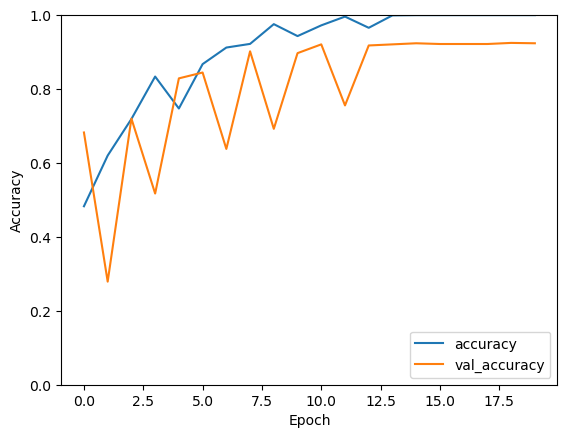

In [44]:
plt.plot(result_V.history['accuracy'], label='accuracy')
plt.plot(result_V.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Prediction

**I've noticed that DenseNet169 is the best model for this to predict with.**

In [45]:
pred=new_model_denseNet169.predict(x_test)

32/32 [==============================] - 7s 113ms/step


In [46]:
x1=[]
for i in range(len(pred)):
    x1.insert(i,np.argmax(pred[i]))

In [47]:
x1=np.array(x1)
x1

array([0, 0, 0, ..., 0, 1, 0])

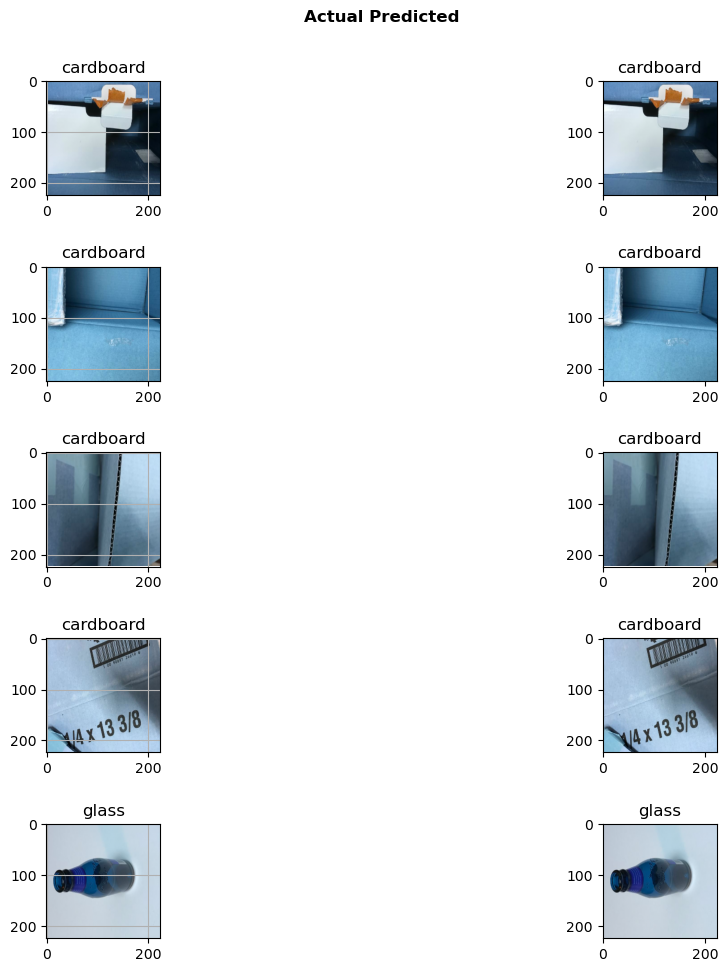

In [48]:
f, ax = plt.subplots(5,2,figsize=(15,10))
f.suptitle('Actual Predicted',fontsize = 12, fontweight ='bold')
a=0
b=1

for i in range(5):
    ax[i,a].imshow(x_test[i])
    ax[i,a].set_title(classes[y_test[i]])
    ax[i,b].imshow(x_test[i])
    ax[i,b].set_title(classes[x1[i]])
    ax[i,a].grid(True)
    ax[i,a].grid(True)


f.tight_layout(pad=2.0)
plt.show()

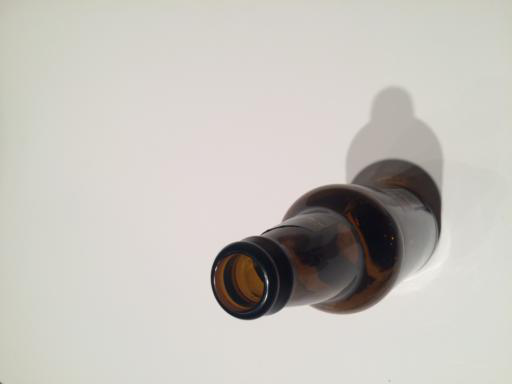

In [49]:
from tensorflow.keras.utils import load_img, img_to_array

img=load_img('/kaggle/input/garbage-classification/Garbage classification/Garbage classification/glass/glass1.jpg')
img

In [50]:
img=img_to_array(img)
img.shape

(384, 512, 3)

In [51]:
img = tf.keras.preprocessing.image.smart_resize(img, (224, 224))

In [52]:
img = img / 255.0
img =np.expand_dims(img, axis =0)
img.shape

(1, 224, 224, 3)

In [53]:
print(new_model_denseNet169.predict(img))

1/1 [==============================] - 1s 1s/step
[[1.6114427e-05 9.9946290e-01 4.7355195e-04 1.0251173e-05 2.2183473e-05
  1.4962609e-05]]


In [54]:
np.argmax(new_model_denseNet169.predict(img))

1/1 [==============================] - 0s 59ms/step


1

In [55]:
img2=load_img('/kaggle/input/garbage-classification/Garbage classification/Garbage classification/paper/paper100.jpg')
img2=img_to_array(img2)
img2 = tf.keras.preprocessing.image.smart_resize(img2, (224, 224))
img2 = img2 / 255.0
img2 =np.expand_dims(img2, axis =0)
print(new_model_denseNet169.predict(img2))

1/1 [==============================] - 0s 43ms/step
[[1.7100844e-01 2.8850423e-02 2.2693155e-03 7.9603970e-01 6.4636423e-04
  1.1857862e-03]]


In [56]:
np.argmax(new_model_denseNet169.predict(img2))

1/1 [==============================] - 0s 48ms/step


3

In [57]:
img3=load_img('/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal10.jpg')
img3=img_to_array(img3)
img3 = tf.keras.preprocessing.image.smart_resize(img3, (224, 224))
img3 = img3 / 255.0
img3 =np.expand_dims(img3, axis =0)
print(new_model_denseNet169.predict(img3))

1/1 [==============================] - 0s 51ms/step
[[0.03433236 0.49046597 0.4236661  0.00770025 0.0414017  0.0024337 ]]


In [58]:
np.argmax(new_model_denseNet169.predict(img3))

1/1 [==============================] - 0s 46ms/step


1